# Notebook  4 - Dinamica Molecolare NVE

Questa lezione contiene una simulazione di dinamica molecolare di un sistema termodinamico in insieme microcanonico (108 molecole di Argon). La simulazione viene svolta nei tre stati di materia solido, liquido e gassoso, con le caratteristiche spiegate di seguito.

   - [  4.1 - Integrazione del codice ](#ex-4.1) 
   
   - [  4.2 - Simulazione con potenziale di Lennard-Jones ](#ex-4.2)
   
       - [  4.2.1 - Termalizzazione ](#ex-4.21)
  
       - [  4.2.2 - Calcolo delle Quantità ](#ex-4.22)
   

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Descrizione del sistema
Il sistema che desideriamo simulare è di natura termodinamica e consiste di $N = 108$ particelle interagenti secondo il potenziale di Lennard-Jones:

\begin{equation}
    V_{LJ}(r) = 4 \varepsilon \left[  \left(\frac{\sigma}{r}\right)^{12} - \left( \frac{\sigma}{r}\right)^6\right]
\end{equation}

Questo potenziale viene espresso in "unità ridotte di Lennard-Jones" ($x^* = \varepsilon x$), dove $x$ rappresenta una grandezza qualsiasi. <br>
Il sistema in questione è stato ampiamente studiato da Verlet e Hansen nel caso specifico dell'Argon, ed è noto il valore dei parametri che lo definiscono, nonché le temperature di equilibrio nei tre stati. I parametri specifici del sistema sono i seguenti: $\sigma = 0.34 , \text{nm}$, $\varepsilon/k_B = 120 , \text{K}$, $m = 39.948 , \text{amu}$. <br>
La simulazione del sistema viene eseguita nell'<b>ensemble microcanonico</b>, che rappresenta l'insieme di tutti i possibili stati del sistema in cui l'energia totale $E$ è fissata. Secondo il postulato che sottende la definizione dell'ensemble microcanonico, ogni stato del sistema è equiprobabile. Dato che il sistema considerato deve quindi essere isolato (per definizione, un sistema chiuso non scambia energia o materia con l'ambiene), saranno costanti durante la simulazione anche il <i> numero di particelle </i> $N = 108$ e il <i> volume </i>, motivo per il quale si dà alla simulazione il nome $NVE$.
<br> <br> 
L'obiettivo della simulazione è visualizzare l'andamento delle seguenti quantità:
- $E/N$: Energia totale per numero di particelle
- $U/N$: Energia potenziale per numero di particelle
- $K/N$: Energia cinetica per numero di particelle
- $T$: Temperatura
- $P$: Pressione


### Spiegazione del metodo
Come è intuibile, sistemi composti da un gran numero di particelle, oltre a essere analiticamente insolubili, diventano molto presto anche computazionalmente inefficienti. Questo perchè mantenere in memoria le caratteristiche di un gran numero di particelle porta molto presto il tempo di esecuzione a divergere. È quindi fondamentale introdurre degli stratagemmi di semplificazione del problema per permettere alla simulazione di operare in tempi accettabili. In questa sezione verranno spiegati i metodi utilizzati in questa lezione:
- <i> Periodic Boundary Condition </i>: Consiste nel ritenere che un sistema di dimensioni infinite sia costituito da una serie di celle elementari le cui caratteristiche (disposizione delle particelle, velocità delle particelle...) si ripetono in maniera periodica. Questo viene implementato nel codice riscalando le posizioni delle particelle in modo tale che rientrino in una cella di lato `box` e volume `vol`. Quando una particella esce da un lato della cella elementare, rientra dal lato opposto. Nel codice, questo compito è svolto dalla funzione `double Pbc(double r)`. 
- <i> Raggio di Cutoff </i>: Come è facile vedere dalla forma analitica, il potenziale di Lennard-Jones è di range illimitato, quindi ogni particella interagisce con tutte le altre presenti. Tuttavia, la forma di questo potenziale è tale per cui il suo effetto è apprezzabile solo a distanze ravvicinate. Per questo si introduce un raggio di cutoff `rcut`, dopo il quale il potenziale viene considerato nullo. Così facendo, ogni particella interagisce solo con un numero limitato di particelle. 
- <i> Algoritmo di Verlet </i>: Tale algoritmo permette di risolvere numericamente le equazioni di Newton basandosi sul troncamento al secondo ordine:
\begin{equation}
    \vec{r}(t + \delta t) \approx 2 \vec{r} (t) - \vec{r}(t - \delta t) + \delta t^2 \vec{a} (t)
\end{equation}
Si nota che per utilizzare l'algoritmo è necessario avere sia $\vec{r}(t + \delta t)$ che $\vec{r}(t - \delta t)$, di conseguenza le condizioni iniziali $r(0), v(0)$ non sono sufficienti ad iniziale la simulazione. L'algoritmo di Verlet è scelto per questa simulazione in quanto rispetta la conservazione dell'energia, è <i> reversibile </i> (come si vede scambiando $\vec{r}(t + \delta t)$ e $\vec{r}(t - \delta t)$) e molto efficiente. Nel codice, esso viene implementato in una forma leggermente modificata all'interno della funzione `Move()`, che si occupa di aggiornare le posizioni delle particelle. Le dimensioni del passo sono contenute nella variabile `delta`, che è modificabile.

<a id="ex-4.1"></a>
## Esercizio 4.1. - Integrazione del codice
Il primo esercizio consiste semplicemente nell'inserire nel codice l'algoritmo per il calcolo della pressione, la cui espressione viene ricavata attraverso il teorema del viriale:

\begin{equation}
    P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j > i}^{N} 48 \varepsilon \left[ \left( \frac{\sigma}{| \vec{r}_i - \vec{r}_j |} \right)^{12} - \frac{1}{2}\left( \frac{\sigma}{| \vec{r}_i - \vec{r}_j |} \right)^6 \right]\right\rangle
\end{equation}

Esprimendo le grandezze in unità di Lennard Jones e notando che l'espressione tra le parentesi angolari corrisponde al viriale si può semplificare l'espressione:

\begin{equation}
    P^* = \rho^* T^* - \frac{\langle W \rangle}{3V^*}
\end{equation}

In questo caso nell'implementazione si è tenuto conto del fatto che le sommatorie non debbano considerare tutte le particelle ma solo quelle con $r< r_{cutoff}$. L'influenza che questa selezione ha sui risultati viene approfondita nel Notebook 7.

<a id="ex-4.2"></a>
## Esercizio 4.2. - Simulazione con Potenziale di Lennard-Jones

<a id="ex-4.21"></a>
### Esercizio 4.2.1. - Termalizzazione
Prima di procedere con la simulazione vera e propria è necessario analizzare un problema fondamentale. All'inizio della simulazione le posizioni delle particelle vengono scelte ricalcando la struttura di un cristallo, con velocità distribuite casualmente secondo la distribuzione di Maxwell-Boltzmann ad una temperatura iniziale scelta. <br>
Si nota tuttavia che la temperatura, durante la simulazione, tende a stabilizzarsi verso un altro valore, diverso da quello iniziale. Questo va contro l'interesse della simulazione, dato che le temperature di equilibrio sono note dallo studio di Verlet-Hansen e le quantità da calcolare sono richieste all'equilibrio.

<br> 
La ragione di questo spostamento può essere nel fatto che le configurazioni e le velocità inziali sono scelte, ed è poco probabile che corrispondano esattamente ad una configurazione di equilibrio. Dato che la temperatura, nell'ensemble microcanonico, non è fissata, essa può variare fino a quando non raggiunge una configurazione di equilibrio. Non sempre questa però è raggiungibile, e quindi il valore a cui si stabilizza dipende da quello iniziale. <br>
Per questo motivo si è cercato per ogni stato il valore di $T_0$ che portasse esattamente il sistema a stabilizzarsi attorno al valore di $T_{eq}$ previsto dalla teoria di Verlet-Hansen:

- stato solido: $\rho^* = 1.1$, $T^*_{eq} = 0.8$ con $r_{cutoff} = 2.2$
- stato liquido: $\rho^* = 0.8$, $T^*_{eq} = 1.1$ con $r_{cutoff} = 2.5$
- stato gassoso: $\rho^* = 0.05$, $T^*_{eq} = 2.2$ con $r_{cutoff} = 5.0$

Si nota che per lo stato gassoso è stato utilizzato un raggio di cutoff significativamente maggiore, questo perchè le molecole interagiscono molto meno e sono più distanti, e di conseguenza per avere effetti più apprezzabili è necessario tenere in considerazione un volume d'interazione maggiore. <br>
Di seguito si riportano i risultati, tutti sono stati svolti utilizzando un numero variabile di blocchi, tutti composti da $n = 1$ step

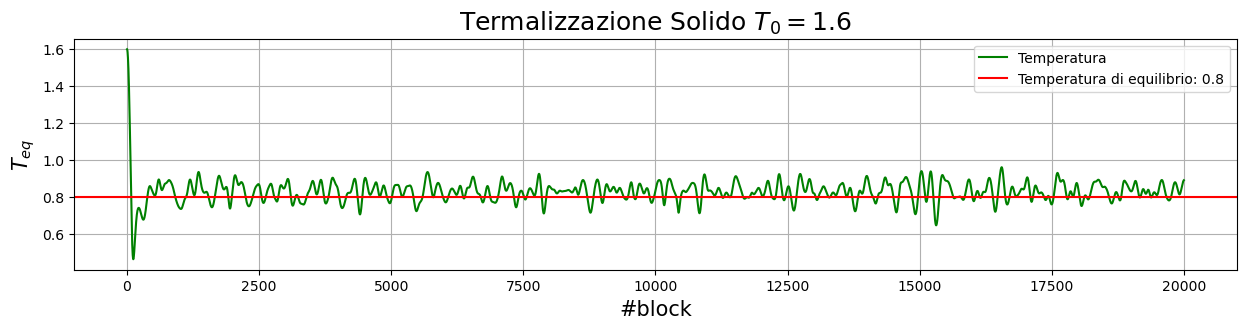

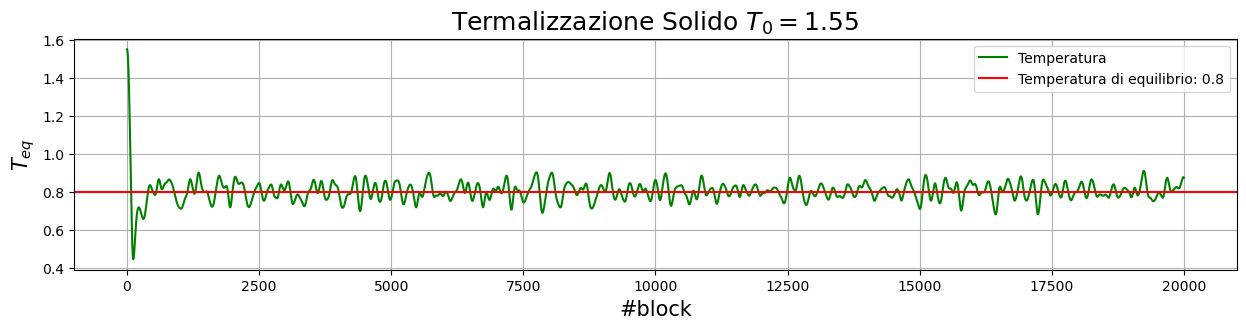

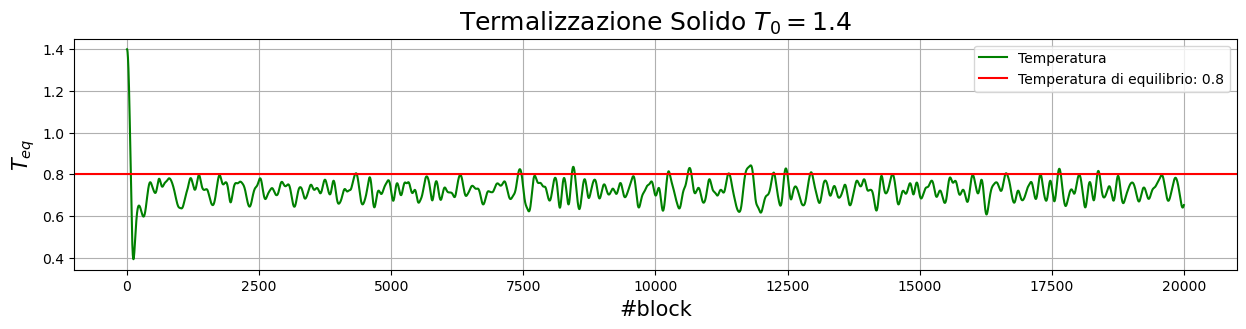

In [2]:
Teq = 0.8

title = ['$T_0 = 1.6$', '$T_0 = 1.55$', '$T_0 = 1.4$']
start = ['16', '155', '14']

for i in range(0,3):
    x, aveT = np.loadtxt("Exercise04-1/output/therma_solid/output_temp_"  + start[i] + ".dat", usecols=(0, 1), delimiter=' ', unpack='true')
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(x, aveT, marker=None, label="Temperatura", color="green")
    ax.set_title("Termalizzazione Solido " + title[i], fontsize=18)
    ax.set_ylabel(r'$T_{eq}$', fontsize=15)
    ax.set_xlabel('#block', fontsize=15)
    ax.axhline(y=Teq, color="r", label="Temperatura di equilibrio: " + str(Teq))
    ax.grid(True)
    ax.legend()
    plt.show()

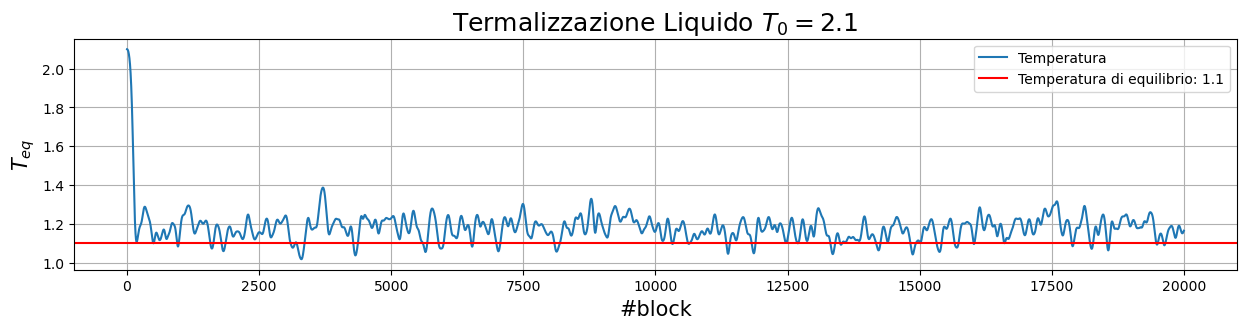

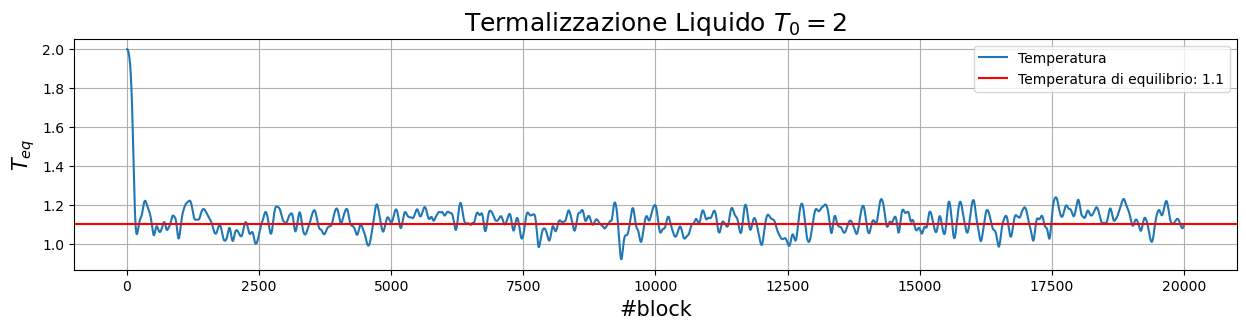

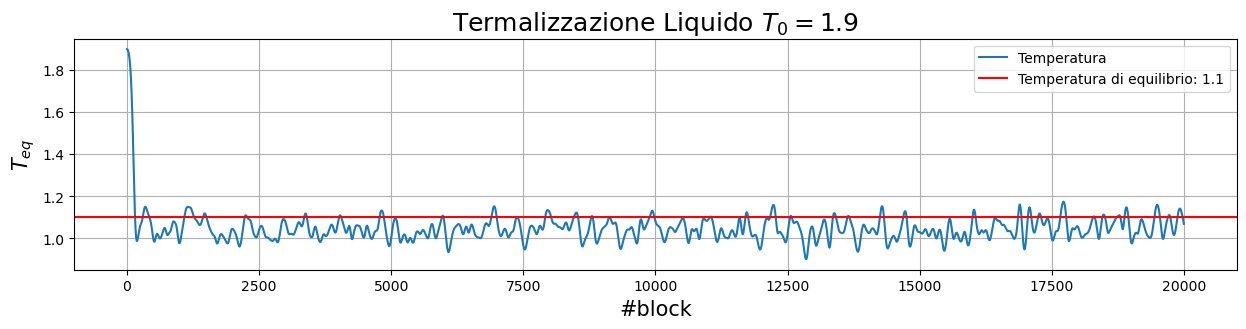

In [3]:
Teq = 1.1

title = ['$T_0 = 2.1$', '$T_0 = 2$', '$T_0 = 1.9$']
start = ['21', '2', '19']

for i in range(0,3):
    x, aveT = np.loadtxt("Exercise04-1/output/therma_liquid/output_temp_"  + start[i] + ".dat", usecols=(0, 1), delimiter=' ', unpack='true')
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(x, aveT, marker=None, label="Temperatura")
    ax.set_title("Termalizzazione Liquido " + title[i], fontsize=18)
    ax.set_ylabel(r'$T_{eq}$', fontsize=15)
    ax.set_xlabel('#block', fontsize=15)
    ax.axhline(y=Teq, color="r", label="Temperatura di equilibrio: " + str(Teq))
    ax.grid(True)
    ax.legend()
    plt.show()

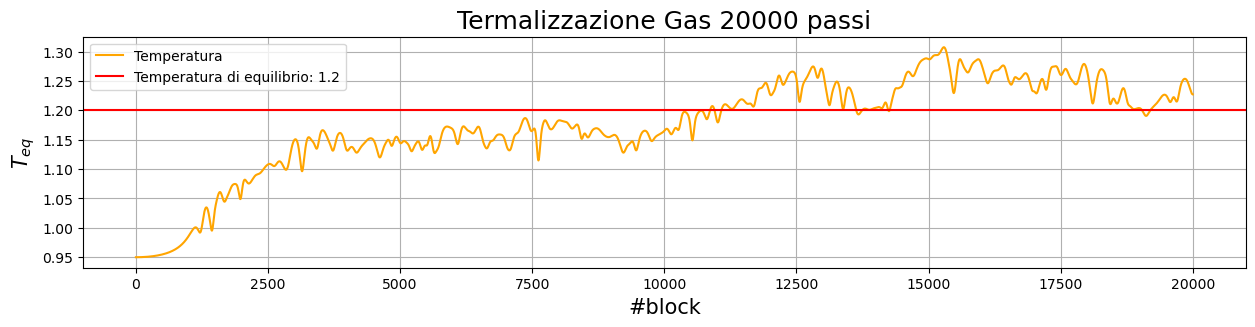

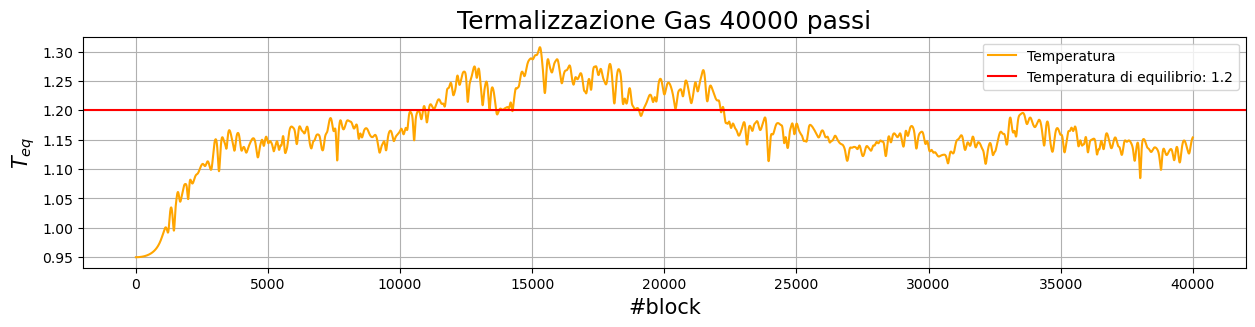

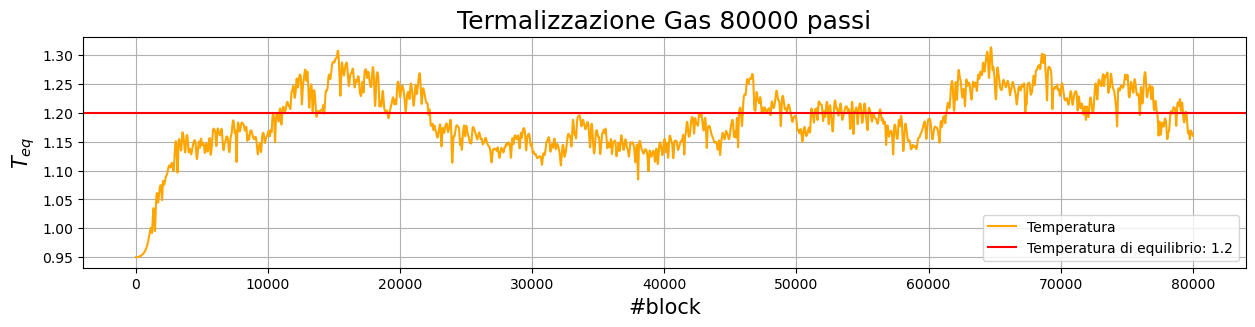

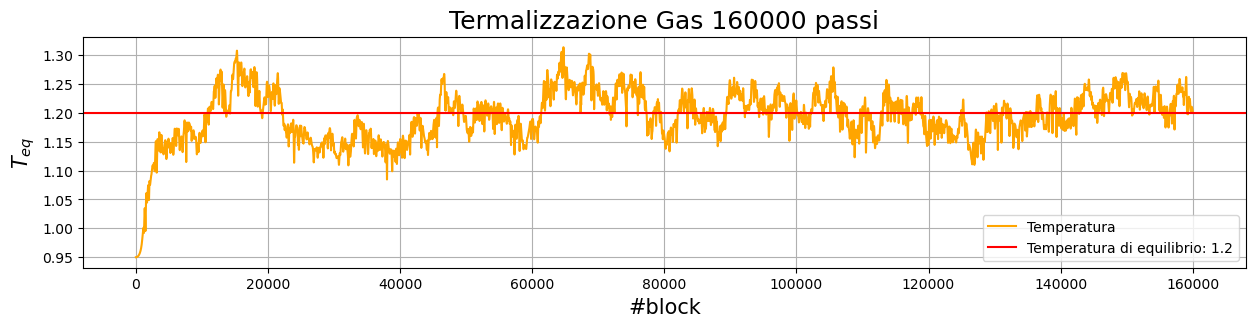

In [4]:
Teq = 1.2

title = ['20000 passi', '40000 passi', '80000 passi', '160000 passi']
start = ['2', '4', '8', '16']

for i in range(0,4):
    x, aveT = np.loadtxt("Exercise04-1/output/therma_gas/output_temp_"  + start[i] + ".dat", usecols=(0, 1), delimiter=' ', unpack='true')
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(x, aveT, marker=None, label="Temperatura", color = "orange")
    ax.set_title("Termalizzazione Gas " + title[i], fontsize=18)
    ax.set_ylabel(r'$T_{eq}$', fontsize=15)
    ax.set_xlabel('#block', fontsize=15)
    ax.axhline(y=Teq, color="r", label="Temperatura di equilibrio: " + str(Teq))
    ax.grid(True)
    ax.legend()
    plt.show()

### Osservazioni
Per lo stato solido e lo stato liquido sono state riportate le stabilizzazioni partendo da tre temperature di equilibrio diverse, che hanno permesso di osservare come la miglior scelta sia partire dalle temperature di:
- stato solido: $T_0 = 1.55$
- stato liquido: $T_0 = 2$
Per lo stato gassoso la situazione è più complessa, in quanto le poche interazioni tra molecole rendono il processo di equilibrazione più lento. Per questo è stata identificata inizialmente la temperatura iniziale ideale a $T_0 = 0.95$, ma nei grafici viene riportata l'equilibrazione al variare dei passi. Si nota che le oscillazoni sono più marcate rispetto agli altri due stati, anche con il quadruplo dei passi. <br>
Per questi motivi si è ritenuto che negli stati solido e liquido, far iniziare la simulazione vera e propria dopo $n = 20000$ step fosse indubbiamente sicuro, mentre per lo stato gassoso si sono aspettati $n = 160000$ passi.

<a id="ex-4.22"></a>
### Esercizio 4.2.2 - Calcolo delle quantità

Di seguito vengono riportati i grafici delle quantità richieste per i tre stati. Tutti le quantità sono state calcolate dopo aver opportunamente equilibrato il sistema. Sono stati utilizzati $N = 50$ blocchi da $n = 2000$ passi ciascuno.

### Stato Solido

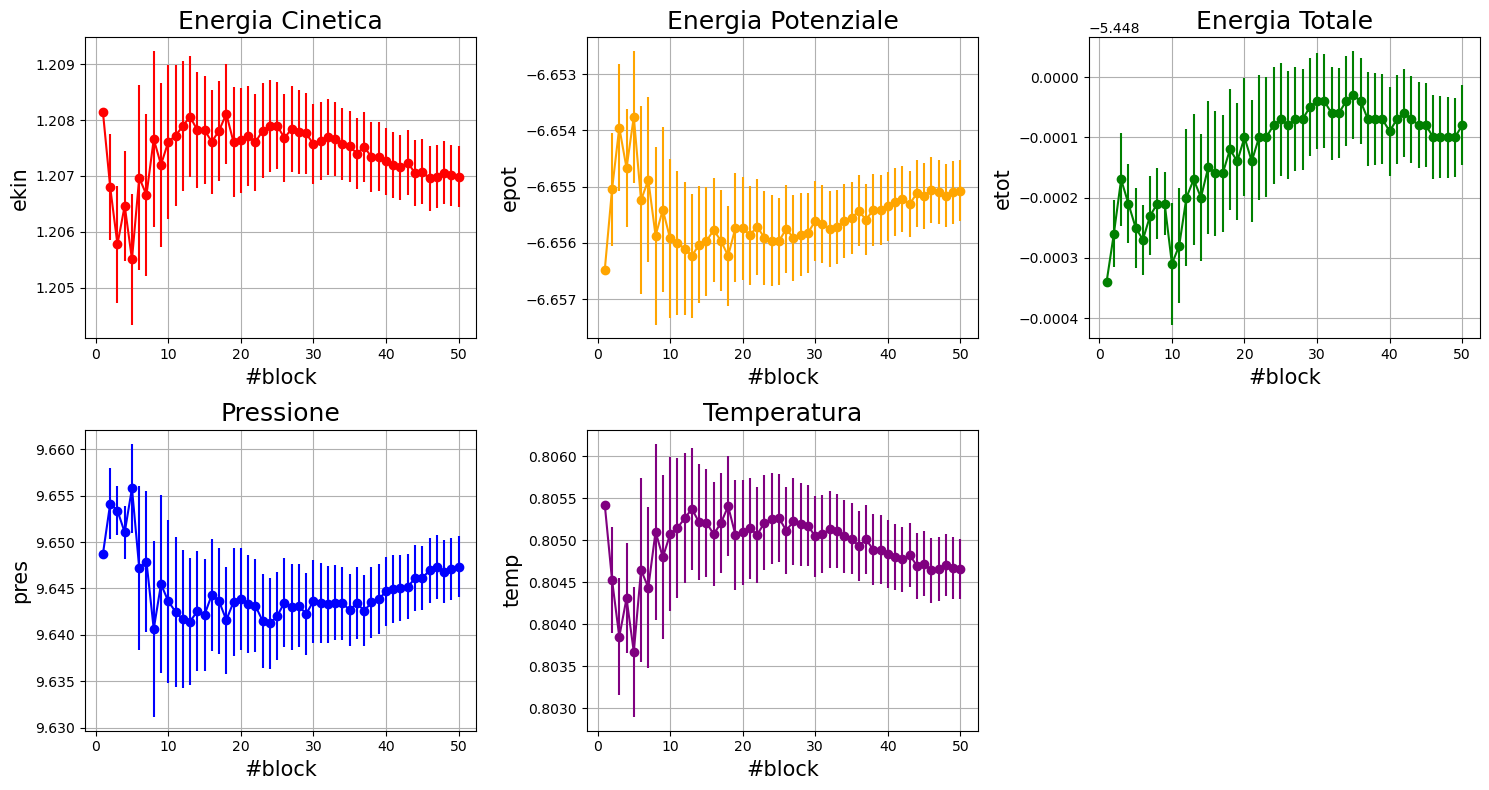

In [5]:
name = ['ekin', 'epot', 'etot', 'pres', 'temp']
title = ['Energia Cinetica', 'Energia Potenziale', 'Energia Totale', 'Pressione', 'Temperatura']
color = ['r', 'orange', 'g', 'b', 'purple']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i in range(5):
    ax = axes[i // 3, i % 3]
    x, ave, err = np.loadtxt("Exercise04-1/output/solid/output_" + name[i] + ".dat", usecols=(0, 2, 3), delimiter='\t', unpack=True)
    ax.errorbar(x, ave, yerr=err, marker='o', label='i={}'.format(i), color=color[i])
    ax.set_title(title[i], fontsize=18)
    ax.set_ylabel(name[i], fontsize=15)
    ax.set_xlabel('#block', fontsize=15)
    ax.grid(True)

axes[1,2].remove()
fig.tight_layout()
plt.show()


### Osservazioni
Si osserva che temperatura, pressione ed energia cinetica scalano nella stessa maniera, come è presumibile considerando che sono proporzionali. L'energia totale, a partire da circa $N \approx 25$ sembra essere stabile, e le oscillazioni precedenti sono comunque di due ordini di grandezza minori rispetto a quelle delle singole energie. È quindi presumibile sostenere che sia stata rispettata la conservazione dell'energia alla base dell'ensemble microcanonico. 

### Stato Liquido

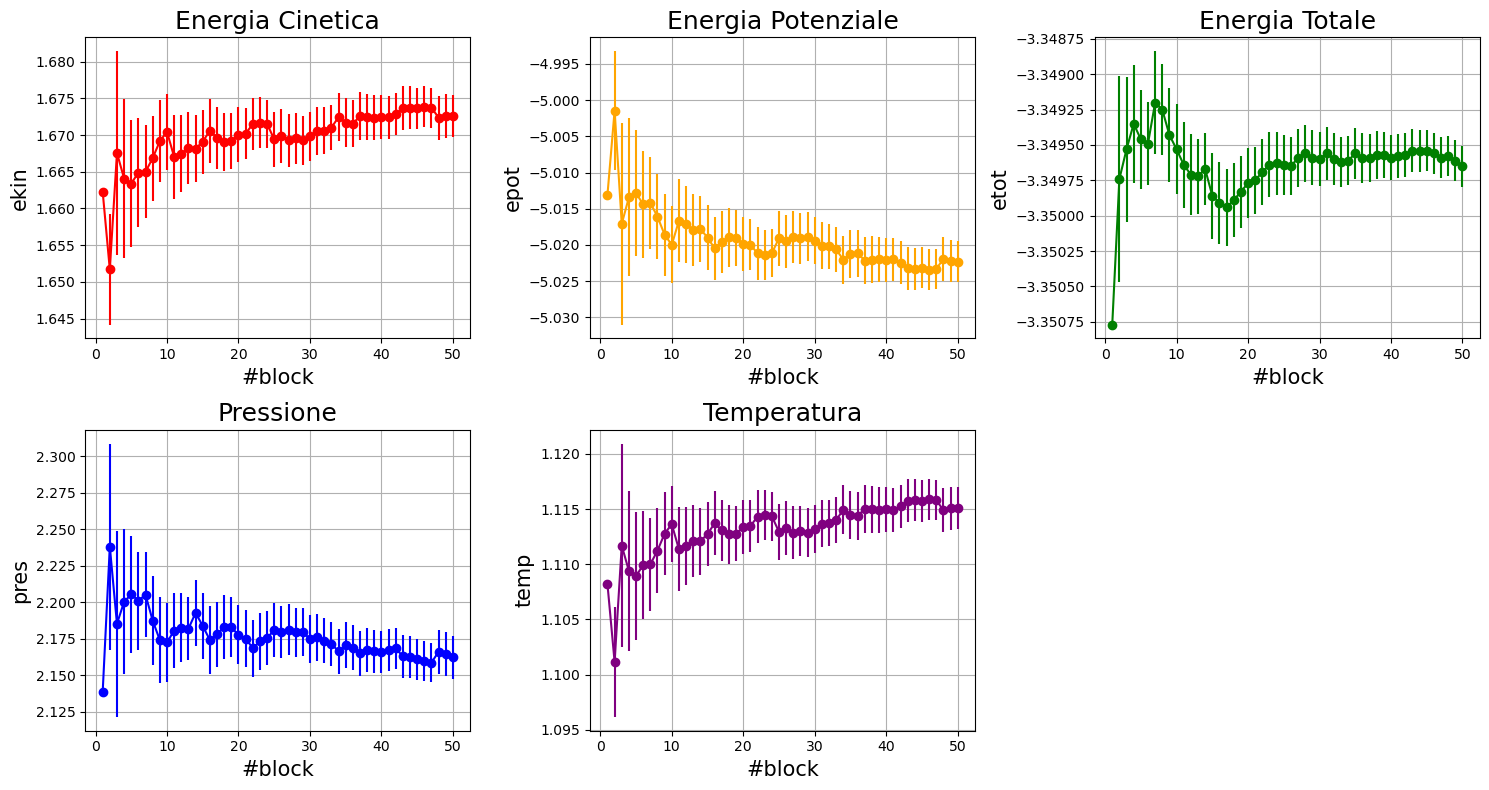

In [6]:
name = ['ekin', 'epot', 'etot', 'pres', 'temp']
title = ['Energia Cinetica', 'Energia Potenziale', 'Energia Totale', 'Pressione', 'Temperatura']
color = ['r', 'orange', 'g', 'b', 'purple']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i in range(5):
    ax = axes[i // 3, i % 3]
    x, ave, err = np.loadtxt("Exercise04-1/output/liquid/output_" + name[i] + ".dat", usecols=(0, 2, 3), delimiter='\t', unpack=True)
    ax.errorbar(x, ave, yerr=err, marker='o', label='i={}'.format(i), color=color[i])
    ax.set_title(title[i], fontsize=18)
    ax.set_ylabel(name[i], fontsize=15)
    ax.set_xlabel('#block', fontsize=15)
    ax.grid(True)

axes[1,2].remove()
fig.tight_layout()
plt.show()


### Stato Gassoso

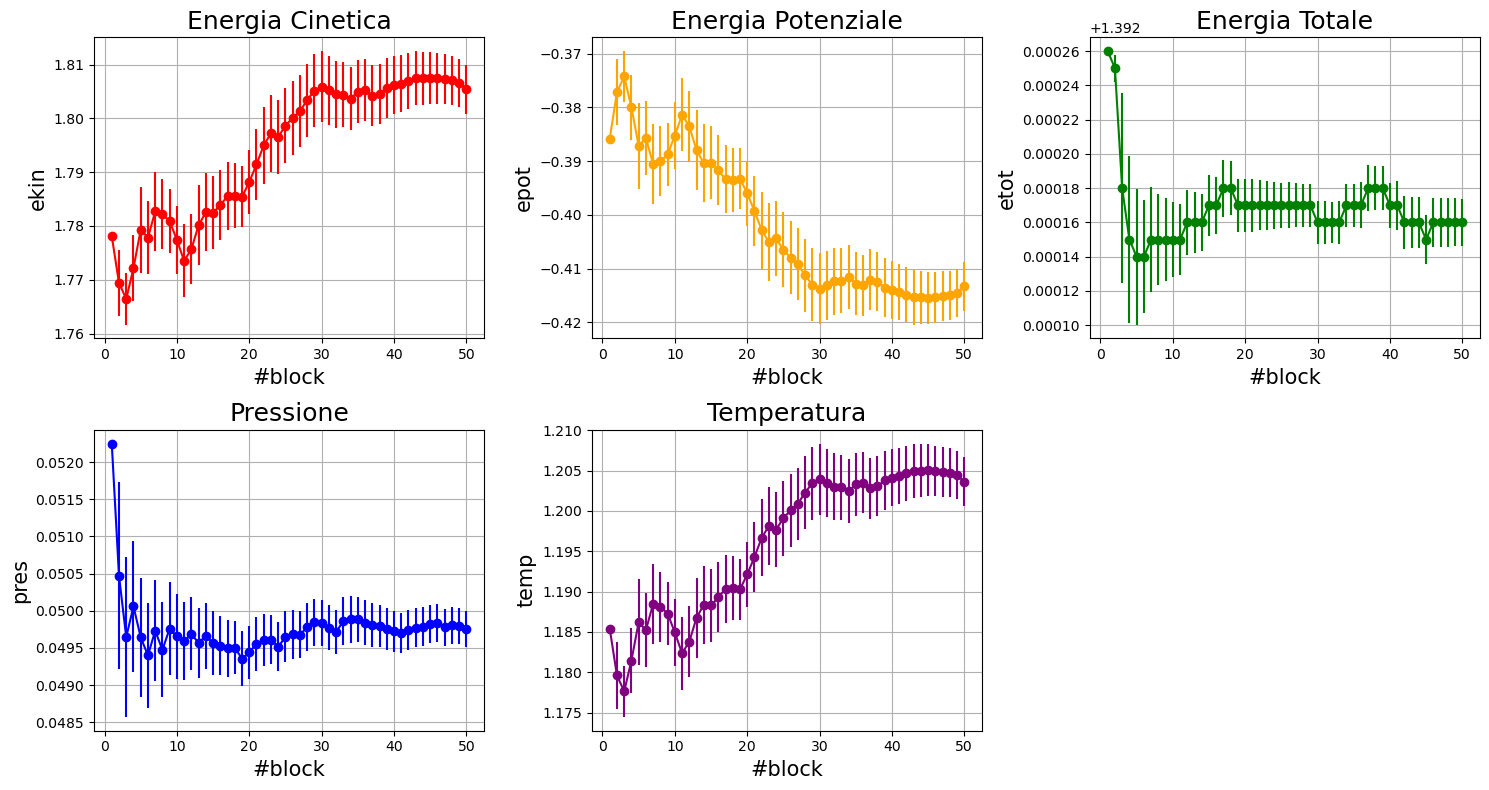

In [7]:
name = ['ekin', 'epot', 'etot', 'pres', 'temp']
title = ['Energia Cinetica', 'Energia Potenziale', 'Energia Totale', 'Pressione', 'Temperatura']
color = ['r', 'orange', 'g', 'b', 'purple']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i in range(5):
    ax = axes[i // 3, i % 3]
    x, ave, err = np.loadtxt("Exercise04-1/output/gas/output_" + name[i] + ".dat", usecols=(0, 2, 3), delimiter='\t', unpack=True)
    ax.errorbar(x, ave, yerr=err, marker='o', label='i={}'.format(i), color=color[i])
    ax.set_title(title[i], fontsize=18)
    ax.set_ylabel(name[i], fontsize=15)
    ax.set_xlabel('#block', fontsize=15)
    ax.grid(True)

axes[1,2].remove()
fig.tight_layout()
plt.show()

Come già notato nell'equilibrazione, si vede che il gas sembra comportarsi in maniera "peggiore" rispetto agli altri due stati, ovvero raggiunge valori meno stabili delle grandezze considerate. Ho ipotizzato che il motivo di questo sia nella configurazione iniziale, che è quella di un cristallo a facce cubiche centrate. Sicuramente questa configurazione è vicina a quella di un solido, e dopo un numero di mosse contenuto può rassomigliare facilmente quella di un liquido, la cui struttura non è ordinata, ma comunque regolata dalla presenza di legami intermolecolari. Per raggiungere la configurazione di un gas, dove le molecole sono poco interagenti e molto distanti tra loro, è verosimile pensare che servano molte più mosse. Di seguito viene plottata la configurazione iniziale che si è usata nella simulazione.

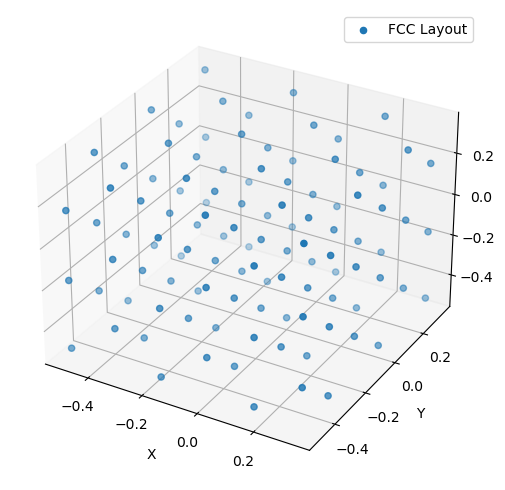

In [8]:
with open("Exercise04-1/config.fcc", 'r') as file:
    lines = file.readlines()
    data1 = [list(map(float, line.strip().split())) for line in lines]

x1, y1, z1 = zip(*data1)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')

ax1.scatter(x1, y1, z1, label='FCC Layout')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax1.legend()
plt.tight_layout()
plt.show()